# Support vector machines

In [12]:
import pandas as pd
df_numeric_nonan = pd.read_csv('processed/df_numeric.csv').dropna()


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_numeric_nonan.drop(columns=['class'])
y = df_numeric_nonan['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of SVC
svm = SVC()

# Define the grid of hyperparameters to search over
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Access the best hyperparameters and the best model found
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

# Optionally, evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy}")


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Model Accuracy: 1.0


In [14]:
from sklearn.svm import SVC
from util.functions import impute_and_train
model = SVC

df_num = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_num, model, best_params)

learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5


{'accuracies': {'mean': [0.9565217391304348, 0.9565217391304348, 0.782608695652174, 1.0, 0.9565217391304348], 'median': [0.9565217391304348, 0.9565217391304348, 0.782608695652174, 1.0, 0.9565217391304348], 'mode': [0.9565217391304348, 0.9565217391304348, 0.782608695652174, 1.0, 0.9565217391304348], 'KNN': [0.9565217391304348, 0.9565217391304348, 0.782608695652174, 1.0, 0.9565217391304348], 'MICE': [0.9565217391304348, 0.9565217391304348, 0.782608695652174, 1.0, 0.9565217391304348], 'iterative': [0.9565217391304348, 0.9565217391304348, 0.782608695652174, 1.0, 0.9565217391304348]}, 'precisions': {'mean': [0.9594202898550724, 0.963768115942029, 0.8662207357859532, 1.0, 0.9604743083003953], 'median': [0.9594202898550724, 0.963768115942029, 0.8662207357859532, 1.0, 0.9604743083003953], 'mode': [0.9594202898550724, 0.963768115942029, 0.8662207357859532, 1.0, 0.9604743083003953], 'KNN': [0.9594202898550724, 0.963768115942029, 0.8662207357859532, 1.0, 0.9604743083003953], 'MICE': [0.9594202898

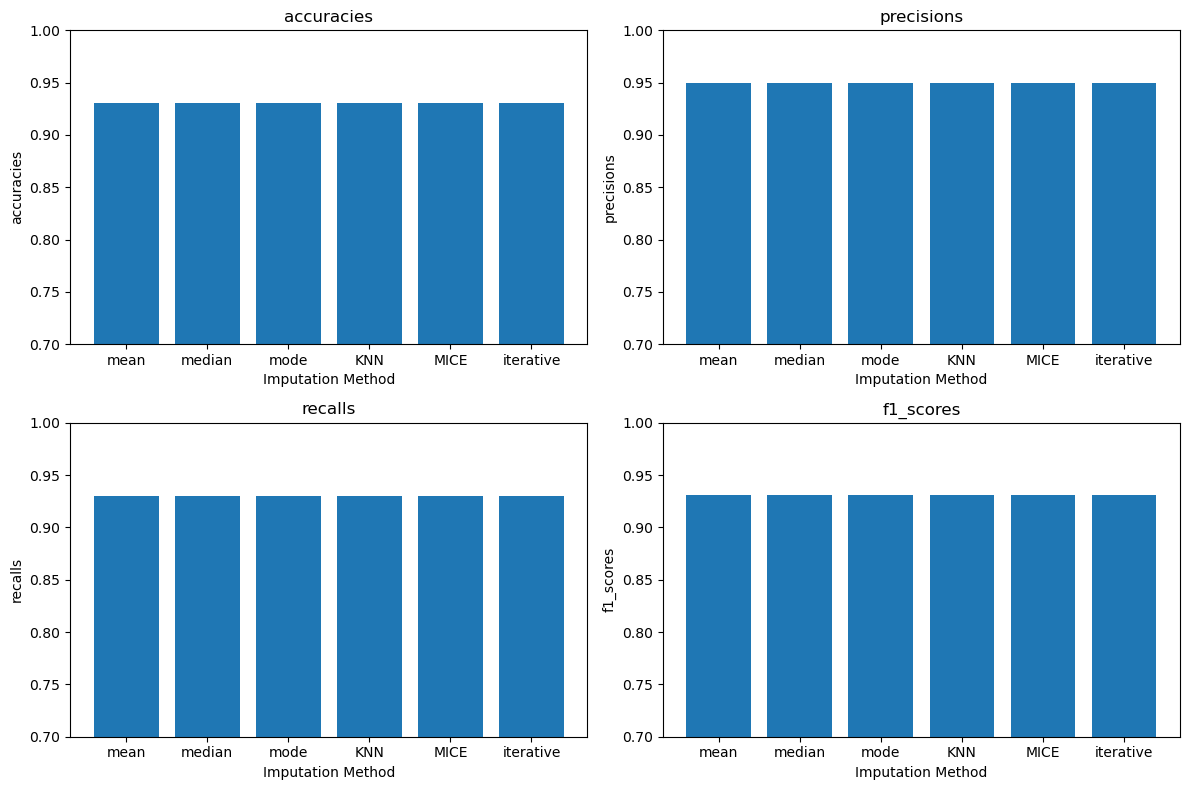

In [15]:
from util.functions import plot_metrics
print(results['metrics'])
plot_metrics(results['metrics'])


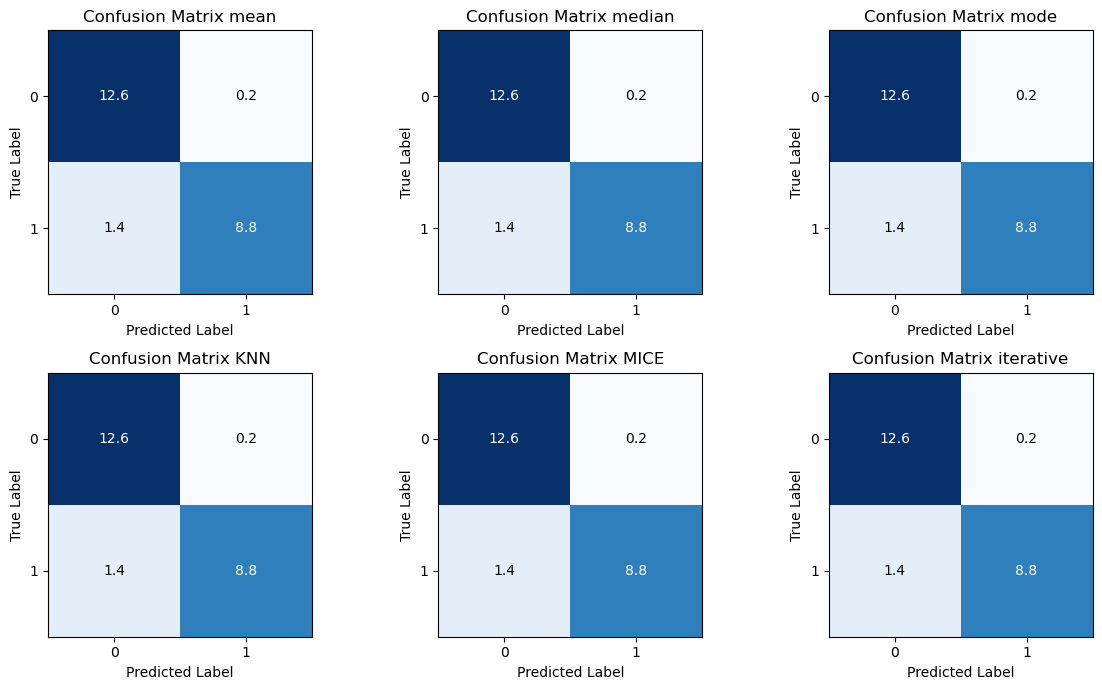

In [16]:
from util.functions import plot_mean_confusion_matrices
plot_mean_confusion_matrices(results['confusion_matrices'])

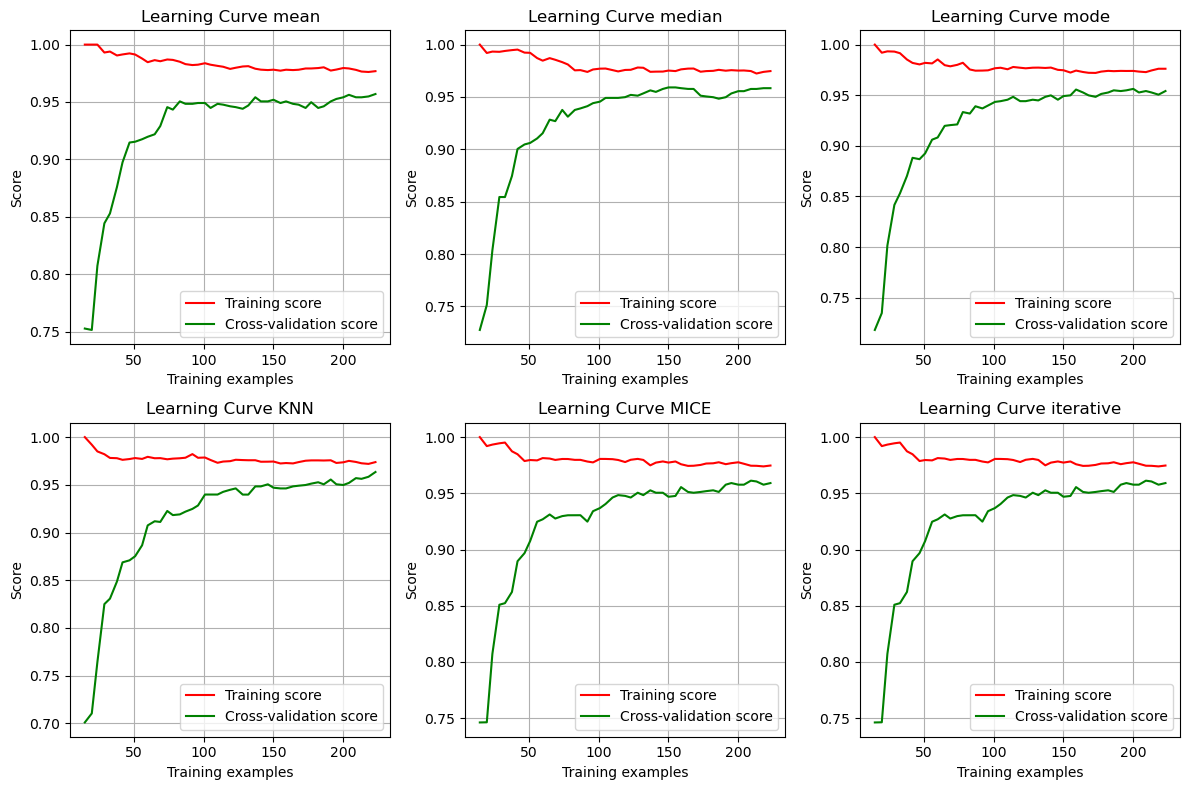

In [17]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

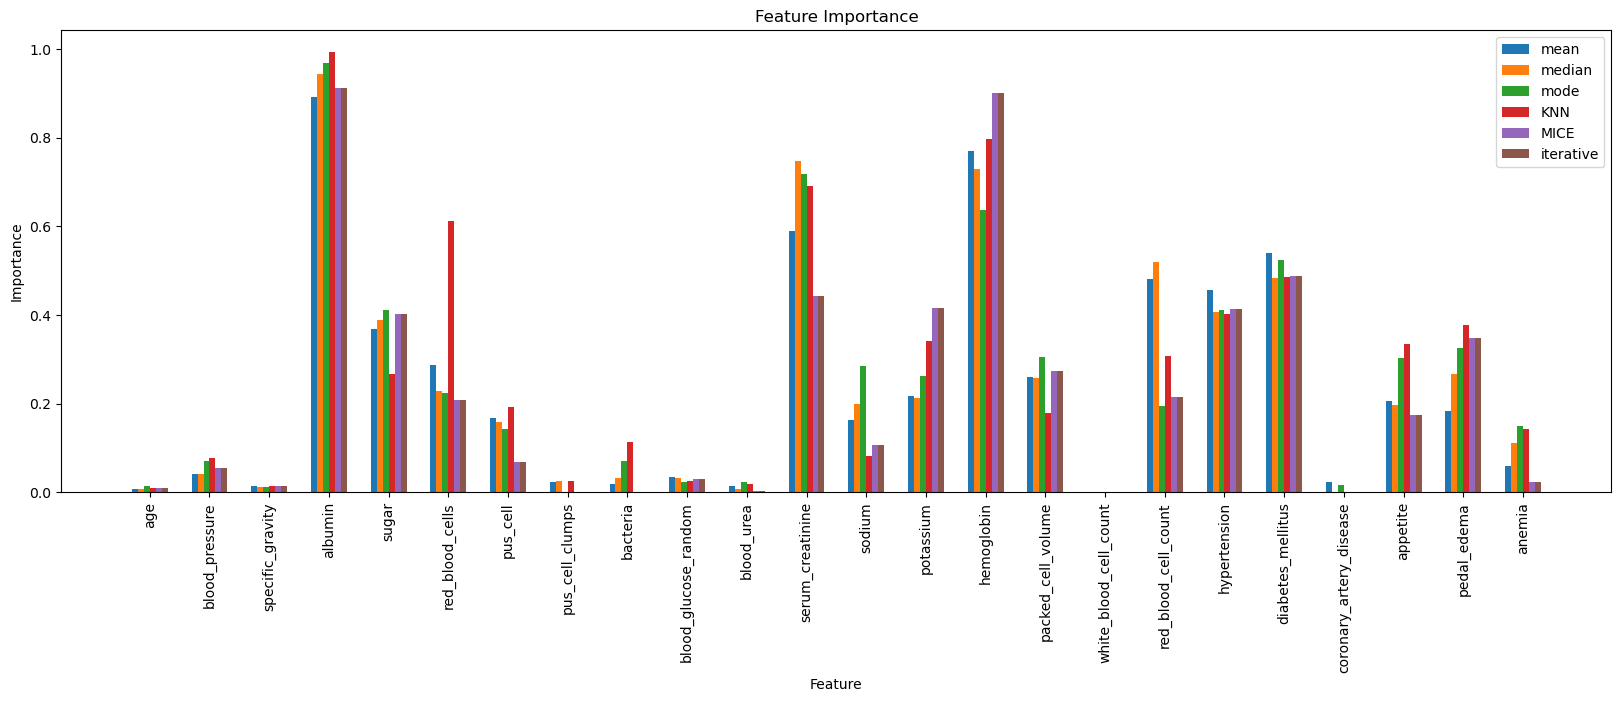

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from util.functions import plot_feature_importances
import numpy as np
# plot all feature importances as subplots
feature_importances = {}
df_numeric = pd.read_csv('processed/df_numeric.csv')
all_fi = []
for (name, models) in results['models'].items():
    norm_coeff = []
    for model in models:
        coefficients = model.coef_[0]
        # Take the absolute values
        abs_coefficients = abs(coefficients)

        # Normalize the absolute coefficients
        scaler = MinMaxScaler()
        normalized_coefficients = scaler.fit_transform(abs_coefficients.reshape(-1, 1)).flatten()
        norm_coeff.append(normalized_coefficients)
        all_fi.append(normalized_coefficients)

    feature_importances[name] = pd.DataFrame({'Importance': np.mean(norm_coeff, axis=0)}, index=df_numeric.drop(columns=['class']).columns)

mean = np.mean(all_fi, axis=0)
norm = mean / np.sum(mean)
all_fi_df = pd.DataFrame(norm, index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])
all_fi_df.to_csv('results/feature_importances_svm.csv')
plot_feature_importances(feature_importances)

In [24]:
metrics_svm = results['metrics']

print(metrics_svm)

print(type(metrics_svm))

metrics_svm = pd.DataFrame(metrics_svm)

for col in metrics_svm.columns:
    print(col)

m = []
for col in metrics_svm.columns:
    m.append(metrics_svm[col])

#print(m)

l = []



for i in range(4):
    for j in m[i]:
        l.append(j)

mean = []

for i in l:
    mean.append(np.mean(i))

print(mean)

print(mean[6:12])

mean_dict = {
    'accuracies': mean[0:6],
    'precisions': mean[6:12],
    'recalls': mean[12:18],
    'f1_scores': mean[18:24]
}

mean_df = pd.DataFrame(mean_dict)

mean_df


mean_df.to_csv('metrics_svm.csv', index = False)

{'accuracies': {'mean': [1.0, 1.0, 1.0, 0.9565217391304348, 1.0], 'median': [1.0, 1.0, 1.0, 1.0, 1.0], 'mode': [1.0, 1.0, 1.0, 0.9130434782608695, 1.0], 'KNN': [1.0, 1.0, 0.9583333333333334, 0.9565217391304348, 1.0], 'MICE': [1.0, 1.0, 0.9583333333333334, 0.9565217391304348, 0.9545454545454546], 'iterative': [1.0, 1.0, 0.9583333333333334, 0.9565217391304348, 0.9545454545454546]}, 'precisions': {'mean': [1.0, 1.0, 1.0, 0.9608695652173914, 1.0], 'median': [1.0, 1.0, 1.0, 1.0, 1.0], 'mode': [1.0, 1.0, 1.0, 0.9130434782608695, 1.0], 'KNN': [1.0, 1.0, 0.9618055555555555, 0.9608695652173914, 1.0], 'MICE': [1.0, 1.0, 0.9613095238095237, 0.9608695652173914, 0.9595959595959596], 'iterative': [1.0, 1.0, 0.9613095238095237, 0.9608695652173914, 0.9595959595959596]}, 'recalls': {'mean': [1.0, 1.0, 1.0, 0.9565217391304348, 1.0], 'median': [1.0, 1.0, 1.0, 1.0, 1.0], 'mode': [1.0, 1.0, 1.0, 0.9130434782608695, 1.0], 'KNN': [1.0, 1.0, 0.9583333333333334, 0.9565217391304348, 1.0], 'MICE': [1.0, 1.0, 0.9